### Assignment 1: Access an open source dataset “Titanic”. Apply pre-processing techniques on the raw dataset.

### Steps

Overview
1. Importing all the libraries necessary for this project
2. Load Data from CSVs
3. Data Preprocessing 
4. Exploratory Data Analysis and Visualization 
    1. Percentage Deaths and Survivors
    2. Female - Male -- Deaths and Survivors
    3. Age of Passengers
    4. Number of Passengers Traveling with their Sibling/Spouse
    5. Number of Passengers traveling with their Parents/Children
    6. Number of Passengers Traveling in Different Socio-Economic Classes
    7. Number of Passengers Traveling in Class 1, 2, 3 - Deaths and Survivors
    8. Box Plot of Survivors from Pclass 1, 2 nad 3
    9. Distribution of Survivors with respect to Embarkment
    10. Number of Passengers that Died and Survived with respect to the Fare
    11. Distribution of Deck (Cabin) and Survived
    12. Distribution of Pclass and Cabin Deck
    13. Which social class had a better chance of survival
 

## 1] Importing all the libraries necessary for this project

In [1]:
#ROHIT MORE TECOB237
import numpy as np # linear algebra 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) 
import matplotlib.pyplot as plt 
import seaborn as sns

## 2]  Load Data from CSVs

In [2]:
main_file = pd.read_csv('train.csv')

In [3]:
# Head of the dataset
main_file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Description of the main_file
main_file.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Check the 
main_file.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
percentage_ofnull= main_file.isnull().sum()*100 / len(main_file)
print(round(percentage_ofnull,2))

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64


## 3] Fixing NaN data values

In [7]:
# Find length of the column "Age"
len(main_file["Age"])

891

In [8]:
# View the NaN in Age for Female-Sex
female_age = main_file[main_file["Sex"] == "female"]["Age"]

In [9]:
female_age.head()

1    38.0
2    26.0
3    35.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [10]:
# View the NaN in Age for Male-Sex
male_age = main_file[main_file["Sex"] == "male"]["Age"] 

In [11]:
male_age.head()

0    22.0
4    35.0
5     NaN
6    54.0
7     2.0
Name: Age, dtype: float64

In [12]:
# Run loop to replace the NaN values with the median value of the column
# The NaN values in female ages are replaced by the median of the female ages
# The NaN values in male ages are replaced by the median of the male ages
     
# Get the median by sex
medians = main_file.groupby('Sex')['Age'].median()
# Set dataframe index by sex
# main_file = main_file.set_index(['Sex'])
# Fill na
main_file['Age'] = main_file['Age'].fillna(medians)
# if you want to reset the index
main_file = main_file.reset_index()        

### A] Explanation: Why median is considered ro replace NaN values in column "Age"?

177 values out of 891 values are missing or NaN for the column "Age".

That is almost 20% of the values that are missing or NaN.

This percentage is not small but it's rather not too big either. 

The NaN values have been replaced with the median of the age values present in the column. 
This is one of the ways to handle missing-at-random data, although note that it gives a different answer.

Replacing the NaN values with the median seems justfifiable as 20% is not too large nor too small.
Also, the median age for male and median age for female have seperately be found and replaced keeping Sex in mind. This is definitely better than replacing the all the NaN values by one single value of median of all present ages.

The NaN values are not replaced by the mode as 20% could be a lot to replace by the most occuring value and this might not do justice to the column Age. 

### Creating Labels to represent data better

In [13]:
# Create Survival Label Column
main_file['Survival'] = main_file.Survived.map({0 : 'Died', 1 : 'Survived'})

In [14]:
main_file.Survival.head()

0        Died
1    Survived
2    Survived
3    Survived
4        Died
Name: Survival, dtype: object

In [15]:
main_file.head(5)

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survival
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Died
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Survived
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Survived
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Died


In [16]:
main_file.Sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [17]:
# Create Pclass Label Column
main_file['Class'] = main_file.Pclass.map({1 : 'First Class', 2 : 'Second Class', 3 : 'Third Class'})

In [18]:
main_file.Class.head()

0    Third Class
1    First Class
2    Third Class
3    First Class
4    Third Class
Name: Class, dtype: object

In [19]:
# Create Embarked Labels Column
main_file['Ports'] = main_file.Embarked.map({'C' : 'Cherbourg', 'Q' : 'Queenstown', 'S' : 'Southampton'})

In [20]:
main_file.Ports.head()

0    Southampton
1      Cherbourg
2    Southampton
3    Southampton
4    Southampton
Name: Ports, dtype: object

In [21]:
main_file.head(1)

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survival,Class,Ports
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,Died,Third Class,Southampton


## 4] Data Analysis

### A] Percentage Deaths and Survivors

This section shows a bar graph and a pie chart of the percentage of deaths and survivors of the passengers on titanic.

In [22]:
# Total number of passengers
no_of_passengers = main_file.groupby("Survived").size()

In [23]:
no_of_passengers

Survived
0    549
1    342
dtype: int64

In [24]:
# Total number of survivors
no_of_survivors = no_of_passengers[1]

In [25]:
no_of_survivors

342

In [26]:
# Total number of deaths
no_of_deaths = no_of_passengers[0]

In [27]:
no_of_deaths

549

In [28]:
# Percentage of total survivors and deaths
percent_of_survivors = (no_of_survivors/(no_of_survivors + no_of_deaths))*100
percent_of_deaths = (no_of_deaths/(no_of_survivors + no_of_deaths))*100

In [29]:
percent_of_survivors

38.38383838383838

In [30]:
percent_of_deaths

61.61616161616161

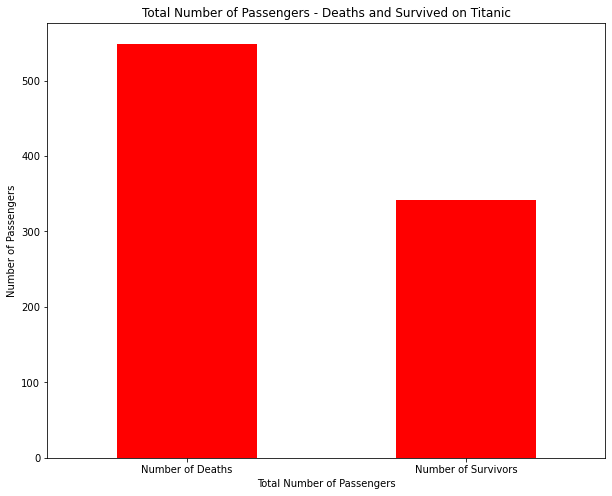

In [31]:
# Plot bar graph for Total Number of Passengers - Deaths and Survived

objects = ('Number of Deaths', 'Number of Survivors')
bars = np.arange(len(objects))
no_of_passengers.plot(kind = "bar", figsize = (10,8), color = 'r')
plt.xticks(bars, objects, rotation='horizontal')
plt.ylabel("Number of Passengers")
plt.xlabel("Total Number of Passengers")
plt.title("Total Number of Passengers - Deaths and Survived on Titanic")
plt.show()

### Analysis - 
It can be analyzed that 

Total Percentage of Number of Deaths = 61.61%

Total Percentage of Number of Survivors = 38.38%

### B] Female - Male -- Deaths and Survivors

In [32]:
print("Percentage of females who survived:", main_file["Survived"][main_file["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", main_file["Survived"][main_file["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


### Analysis - 
It can be analyzed that 

Percent of Female Passengers Survived:	74.20%

Percent of Male Passengers Survived:	18.89%

### C] Age of Passengers

This section shows the distribution of the age of the passengers.

In [33]:
age_of_passengers = main_file.groupby("Age").size()

In [34]:
age_of_passengers.head(30)

Age
0.42      1
0.67      1
0.75      2
0.83      2
0.92      1
1.00      7
2.00     10
3.00      6
4.00     10
5.00      4
6.00      3
7.00      3
8.00      4
9.00      8
10.00     2
11.00     4
12.00     1
13.00     2
14.00     6
14.50     1
15.00     5
16.00    17
17.00    13
18.00    26
19.00    25
20.00    15
20.50     1
21.00    24
22.00    27
23.00    15
dtype: int64

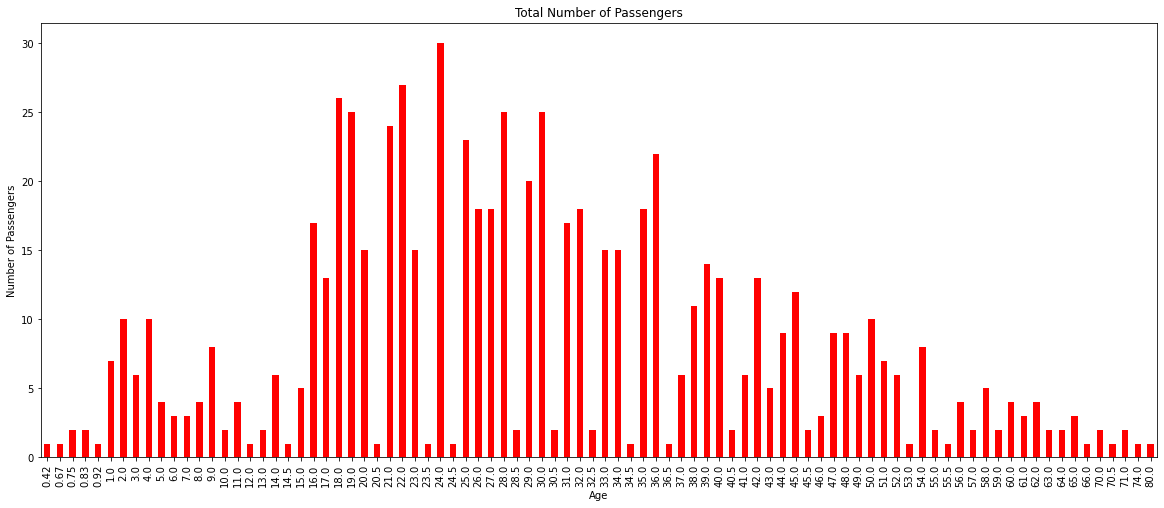

In [35]:
# Plot bar graph for Age of passengers on titanic


age_of_passengers.plot(kind = "bar", figsize = (20,8), color = 'red')
plt.ylabel("Number of Passengers")
plt.xlabel("Age")
plt.title("Total Number of Passengers")
plt.show()

In [36]:
main_file["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### Analysis - 
It can be analyzed that 

The Age of Passengers is a Normal Distribution 
with a mean of 29.44. 

### D] Number of Passengers Traveling with their Sibling/Spouse

This section shows a bar plot of Passengers Traveling with their Sibling/Spouse

In [37]:
# Group by Sibling/Spouse Traveling with their Sibling/Spouse
sibsp = main_file.groupby("SibSp").size()

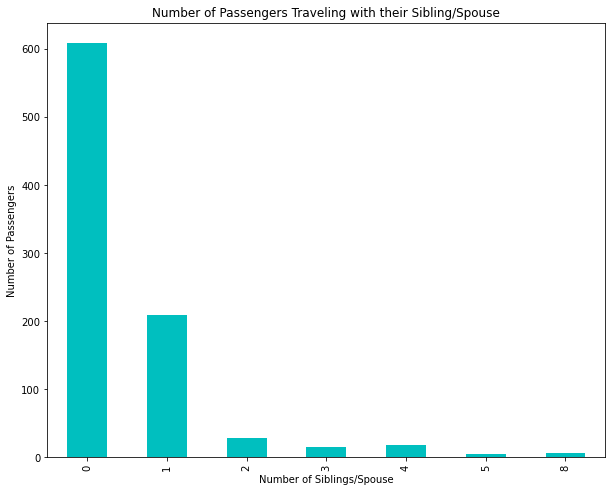

In [38]:
# Plot bar graph for Number of Passengers Traveling with their Sibling/Spouse

sibsp.plot(kind = "bar", figsize = (10,8), color = 'c')
plt.ylabel("Number of Passengers")
plt.xlabel("Number of Siblings/Spouse")
plt.title("Number of Passengers Traveling with their Sibling/Spouse")
plt.show()

### Analysis - 
It can be analyzed that 

Maximum passengers onboard Titanic, were not with their sibling or spouse. 

### E] Number of Passengers traveling with their Parents/Children

This section shows a bar plot of the Number of Passengers traveling with their Parents/Children

In [39]:
# Group data by Passengers traveling with their Parents/Children
parch = main_file.groupby("Parch").size()

In [40]:
parch

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
dtype: int64

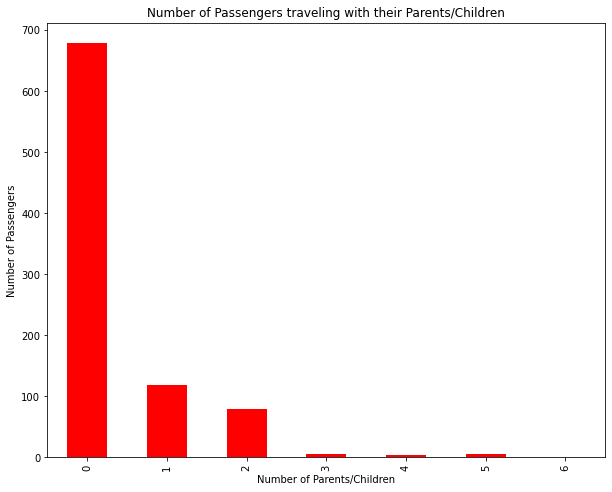

In [41]:
# Bar plot of Number of Passengers traveling with their Parents/Children

parch.plot(kind = "bar", figsize = (10,8), color = 'r')
plt.ylabel("Number of Passengers")
plt.xlabel("Number of Parents/Children")
plt.title("Number of Passengers traveling with their Parents/Children")
plt.show()

### Analysis - 
It can be analyzed that 

Maximum passengers onboard Titanic, were not with their parents or children. 

### F] Number of Passengers Traveling in Different Socio-Economic Classes

In [42]:
# Group data by Number of Passengers Traveling in Different Socio-Economic Classes (Pclass)
pclass = main_file.groupby("Pclass").size()

In [43]:
pclass

Pclass
1    216
2    184
3    491
dtype: int64

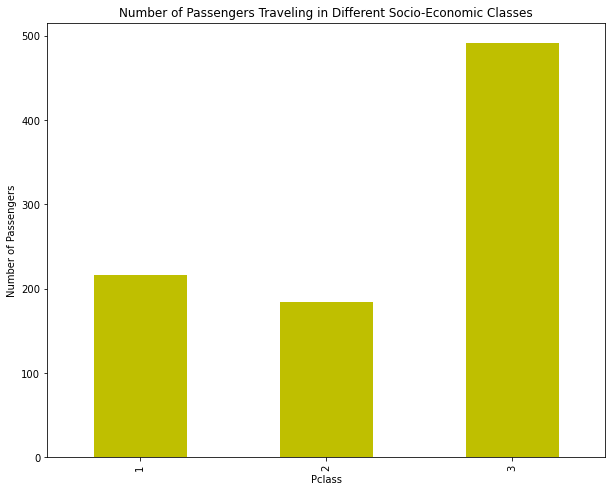

In [44]:
# Bar plot of Number of Passengers Traveling in Different Socio-Economic Classes

pclass.plot(kind = "bar", figsize = (10,8), color = 'y')
plt.ylabel("Number of Passengers")
plt.xlabel("Pclass")
plt.title("Number of Passengers Traveling in Different Socio-Economic Classes")
plt.show()

### Analysis - 
It can be analyzed that 

Majority passengers onboard Titanic, were traveling in Class 3. 

### G] Number of Passengers Traveling in Class 1, 2, 3 - Deaths and Survivors

This section shows a bar plot of the Number of Passengers Traveling in Class 1, 2, 3 - Deaths and Survivors

In [45]:
# Group data by Number of Passengers Traveling in Class 1, 2, 3 - Deaths and Survivors

class_survived = main_file.groupby(["Pclass","Survived"])

In [46]:
class_survived.size()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

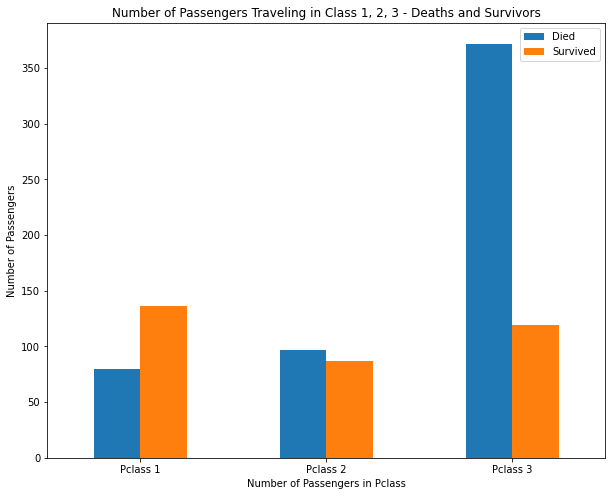

In [47]:
# Bar plot of Number of Passengers Traveling in Class 1, 2, 3 - Deaths and Survivors

objects = ('Pclass 1', 'Pclass 2', 'Pclass 3')
bars = np.arange(len(objects))
class_survived.size().unstack().plot(kind = "bar", figsize = (10,8))
plt.xticks(bars, objects, rotation='horizontal')
plt.ylabel("Number of Passengers")
plt.xlabel("Number of Passengers in Pclass")
plt.title("Number of Passengers Traveling in Class 1, 2, 3 - Deaths and Survivors")
plt.legend(['Died', 'Survived'])
plt.show()

### Analysis - 

Class 1: 
Deaths - 37%
Survived - 63%

Class 2:
Deaths - 53%
Survived - 47%

Class 3:
Deaths - 76%
Survived - 24%

It can be analyzed that about 76% passengers have died from Class 3 and this percentage is much more than that the passenger deaths from Class 1 and Class 2.

### H] Box Plot of Survivors from Pclass v/s Fare

This sections shows a Box Plot of Survivors from Pclass v/s Fare

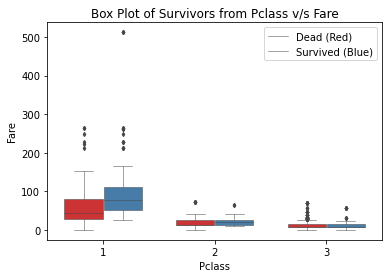

In [48]:
# Box Plot of Survivors from Pclass v/s Fare

ax = sns.boxplot(x = "Pclass", y = "Fare", hue = "Survived", data = main_file, palette = "Set1", width = 0.7, fliersize = 3, whis = 1.5, linewidth = 0.5) 
plt.title("Box Plot of Survivors from Pclass v/s Fare")
plt.legend(["Dead (Red)", "Survived (Blue)"])
plt.show()

### Analysis - 

It can be analyzed that passengers who paid more fare and are from Pclass 3 have more survivors. 

### J] Number of Passengers that Died and Survived with respect to the Fare

This section shows a box plot of Number of Passengers that Died and Survived with respect to the Fare

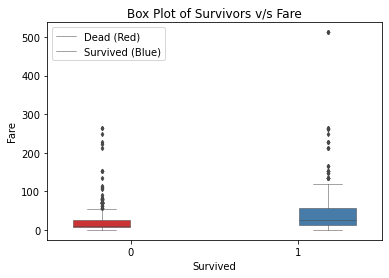

In [49]:
ax = sns.boxplot(x = "Survived", y = "Fare", hue = "Survived", data = main_file, palette = "Set1", width = 0.7, fliersize = 3, whis = 1.5, linewidth = 0.5) 
plt.title("Box Plot of Survivors v/s Fare")
plt.legend(["Dead (Red)", "Survived (Blue)"])
plt.show()

### K] Distribution of Deck (Cabin) and Survived

This section shows a bar plot Distribution of Deck (Cabin) and Survived.

Here, the Deck from the Cabin column from the original titanic dataset is extracted to show the Deck of Cabin. 

In [50]:
# Group data by Cabin
cabin = main_file.groupby("Cabin").size()

In [51]:
# Creating new Cabin_Deck by extracting first letter from Cabin column of original dataset

main_file["Cabin_Deck"] = main_file["Cabin"].astype(str).str[0]

In [52]:
cabin_deck = main_file.groupby("Cabin_Deck").size()

In [53]:
cabin_deck

Cabin_Deck
A     15
B     47
C     59
D     33
E     32
F     13
G      4
T      1
n    687
dtype: int64

### Analysis - 

Here, the deck is extracted from the Cabin column of the original titanic dataset.

As shown above, there are 687 null values out of 891 data values. 

I dropped the Null Values and plotted the left out values of the deck. 

Hence, this distribution is not very accurate as 77% of the value are null.

The above count plot shows the number of passengers with a deck assignment by passenger class. You can see that the majority of passengers with available deck assignments are first class passengers.

It also clearly shows that an overwhelming majority of second and third class had no known Deck assignment. This could possibly be because second and third class passengers really did not have a staff to service them; this the Titanic really didn't need to know where their cabin was located.

### L] Which social class had a better chance of survival

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


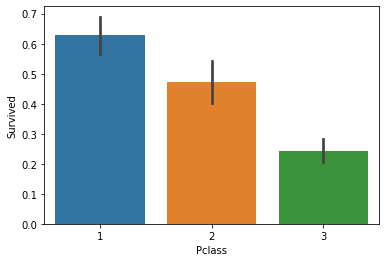

In [54]:
sns.barplot(x="Pclass", y="Survived", data=main_file)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", main_file["Survived"][main_file["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", main_file["Survived"][main_file["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", main_file["Survived"][main_file["Pclass"] == 3].value_counts(normalize = True)[1]*100)

 #### M] Does having a sibling or spouse increased chances of Survival?

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


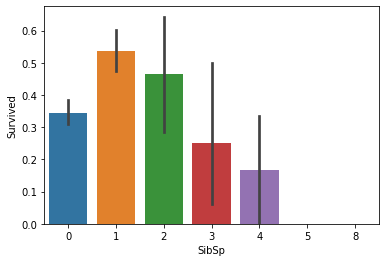

In [55]:
# bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data= main_file)

print("Percentage of SibSp = 0 who survived:", main_file["Survived"][main_file["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", main_file["Survived"][main_file["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", main_file["Survived"][main_file["SibSp"] == 2].value_counts(normalize = True)[1]*100)

#### M]  How is no of children effecting the rate of Survial?

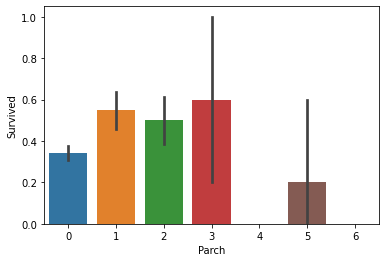

In [56]:
sns.barplot(x="Parch", y="Survived", data=main_file)
plt.show()